<a href="https://colab.research.google.com/github/ToyTeX/NumericalNotebooks/blob/main/LatentVectorHomtopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If latent_A and latent_B are vectors in the latent space of a model, then a linear interpolation can be defined by a [straight line homotopy](https://proofwiki.org/wiki/Definition:Straight-Line_Homotopy) - creating a smooth, continuous path between the two.   Latent space homotopy traces straight line homotopic paths on the learned data manifold.  Essentially, we want to
 "morph" between vectors similar to shape interpolation.    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:

# Example latent vectors
latent_A = np.random.randn(128)
latent_B = np.random.randn(128)

# Function to linearly interpolate using straight line homtopy
def interpolate_latents(latent_A, latent_B, num_steps=10):
    return [(1 - t) * latent_A + t * latent_B for t in np.linspace(0, 1, num_steps)]

# Interpolate between them
interpolated_latents = interpolate_latents(latent_A, latent_B, num_steps=20)

Now given two latents, let's

1.   Interpolate between them via straight line homotopy
2.   Decode each intermediate latent vector into a 3D shape, typically via a trained decoder d(z, x) that returns the SDF value at a spatial point.  Suppose sdf = d(z, x), where z is the latent of a shape and  x is a point in 3d space.  



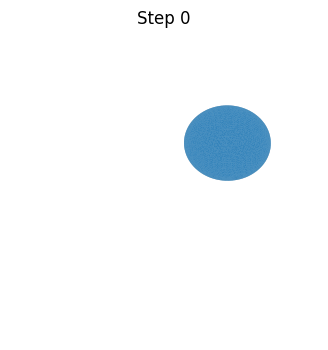

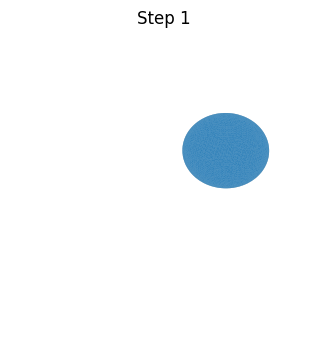

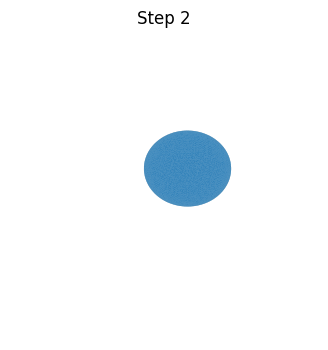

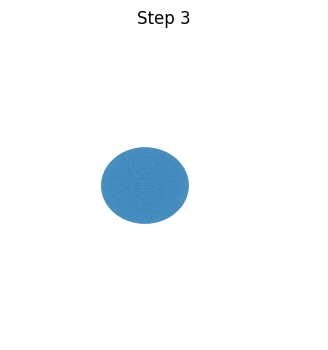

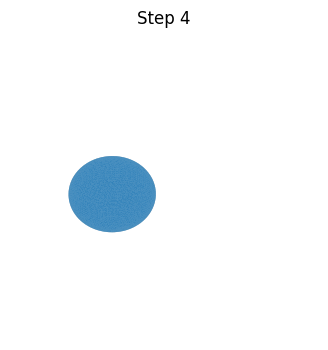

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Latent vectors (e.g., sampled from trained model)
latent_A = torch.randn(1, 128)
latent_B = torch.randn(1, 128)

# Linear interpolation
def interpolate_latents(latent_A, latent_B, num_steps=30):
    return [(1 - t) * latent_A + t * latent_B for t in np.linspace(0, 1, num_steps)]

# Grid of 3D points to evaluate the SDF on
def create_grid(resolution=64, bounds=1.0):
    lin = torch.linspace(-bounds, bounds, resolution)
    grid = torch.stack(torch.meshgrid(lin, lin, lin, indexing="ij"), dim=-1)
    return grid.reshape(-1, 3)  # (N, 3)

# Visualize using a marching cubes method
def sdf_to_mesh(sdf_values, grid_coords, resolution=64, level=0.0):
    from skimage.measure import marching_cubes
    sdf_numpy = sdf_values.view(resolution, resolution, resolution).cpu().numpy()
    try:
        verts, faces, _, _ = marching_cubes(sdf_numpy, level=level)
        verts = verts / (resolution - 1) * 2 - 1  # scale to [-1, 1]
        return verts, faces
    except ValueError as e:
        print(f"Error in marching_cubes: {e}")
        print(f"SDF value range: [{sdf_numpy.min()}, {sdf_numpy.max()}]")
        return None, None


# Sample decoder (replace with later)
def decoder(z, x):
    # Mock decoder: SDF of sphere at z[:3]
    center = z[0, :3].clamp(-0.5, 0.5) # Clamp center to be within a reasonable range
    return torch.norm(x - center, dim=1) - 0.5

# Morph shapes
grid = create_grid(resolution=64)
interpolated_latents = interpolate_latents(latent_A, latent_B, num_steps=5) # Reduced num_steps

for i, z in enumerate(interpolated_latents):
    sdf_values = decoder(z, grid)  # Shape: (N,)
    verts, faces = sdf_to_mesh(sdf_values, grid, resolution=64)

    # Plot using matplotlib
    if verts is not None and faces is not None:
        from mpl_toolkits.mplot3d.art3d import Poly3DCollection
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111, projection='3d')
        mesh = Poly3DCollection(verts[faces], alpha=0.7)
        ax.add_collection3d(mesh)
        ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
        plt.title(f"Step {i}")
        plt.axis('off')
        plt.show()

Latent A to Latent B sphere: There exists a (numerical) **homotopy continuation path**  between them on the data manifold defined via **straight line homotopy**.  If we can construct a continuation path between two latents, we can approximate a continuous deformation between them.   

 **Homotopy** is the formalization of shape deformation (e.g. from the torus to the mug).  Two closed forms that are homotopic to one another have the same genus.  

